In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import math
import collections
from collections import Counter

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

In [2]:
data = pd.read_csv('../input/train.csv')

In [7]:
data.dropna()
print(data.head(15))

    id      ...       is_duplicate
0    0      ...                  0
1    1      ...                  0
2    2      ...                  0
3    3      ...                  0
4    4      ...                  0
5    5      ...                  1
6    6      ...                  0
7    7      ...                  1
8    8      ...                  0
9    9      ...                  0
10  10      ...                  0
11  11      ...                  1
12  12      ...                  1
13  13      ...                  1
14  14      ...                  0

[15 rows x 6 columns]


**Data Distribution**

In [9]:
data.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


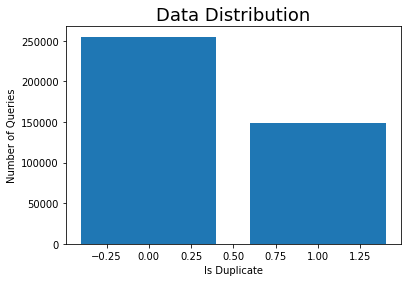

In [10]:
dup_check = data['is_duplicate'].value_counts()
plt.bar(dup_check.index, dup_check.values)
plt.ylabel('Number of Queries')
plt.xlabel('Is Duplicate')
plt.title('Data Distribution', fontsize = 18)
plt.show()

In [11]:
print("Above Graph Features :  [Is Not Duplicate | Is Duplicate]\n")
print("Above Graph Indices  : ", dup_check.index)
print("\nAbove Graph Values   : ", dup_check.values)

Above Graph Features :  [Is Not Duplicate | Is Duplicate]

Above Graph Indices  :  Int64Index([0, 1], dtype='int64')

Above Graph Values   :  [255027 149263]


In [12]:
print("Above Graph %age Values :")
print( dup_check / dup_check.sum())

Above Graph %age Values :
0    0.630802
1    0.369198
Name: is_duplicate, dtype: float64


In [13]:
questions = data[['id', 'question1', 'question2', 'is_duplicate']]
word_count = []
for row in questions.itertuples():
    q1 = len(str(row[2]).split())
    q2 = len(str(row[3]).split())
    word_count.append(q1 + q2)  

In [14]:
len(word_count)

404290

In [15]:
word_count = pd.DataFrame(data = word_count, columns = ['word_count'])

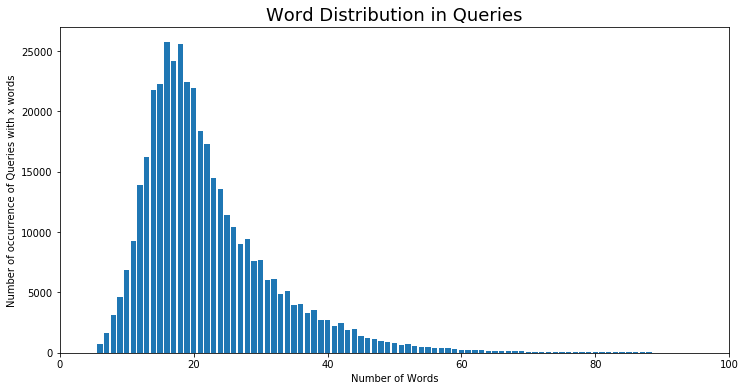

In [16]:
count = word_count['word_count'].value_counts()
plt.figure(figsize=(12,6))
plt.bar(count.index, count.values)
plt.ylabel('Number of occurrence of Queries with x words')
plt.xlabel('Number of Words')
plt.title('Word Distribution in Queries', fontsize = 18)
plt.xlim(0, 100)
plt.show()

**Cosine Similarity**

In [17]:
ps = PorterStemmer()

def tokenize(text):
    text = re.sub('[^a-zA-Z]+', ' ', text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    words = word_tokenize(text)
    return Counter(words)

In [18]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / float(denominator)

**Jaccard Similarity**

In [20]:
def DistJaccard(str1, str2):
    str1 = set(str1.split())
    str2 = set(str2.split())
    return float(len(str1 & str2)) / len(str1 | str2)    


***Results***

In [21]:
queries = data[['id', 'question1', 'question2', 'is_duplicate']]
cosine_list = []
jaccard_list = []
i = 1
for row in questions.itertuples():
    text1 = str(row[2])
    text2 = str(row[3])
    vector1 = tokenize(text1)
    vector2 = tokenize(text2) 
    cosine = get_cosine(vector1, vector2)
    jaccard = DistJaccard(text1, text2)
    cosine_list.append(cosine)    
    jaccard_list.append(jaccard)
        
    i+=1
    if (i == 1000):
        break    

In [22]:
c = data[:999]

In [23]:
c.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [24]:
c.insert(6, "Cosine Score", cosine_list) 
c.insert(7, "Jaccard Score", jaccard_list) 

In [26]:
c.head(25)

,id,qid1,qid2,question1,question2,is_duplicate,Cosine Score,Jaccard Score
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.942809,0.769231
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.565685,0.250000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0.547723,0.142857
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.000000,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,0.282843,0.111111
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,0.527046,0.280000
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,0.000000,0.000000
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,0.500000,0.333333
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,1.000000,0.600000
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,0.547723,0.200000
